In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import matplotlib.pyplot as plt

from torch import nn, optim
from torch.autograd import Variable

# Tensors trong [Pytorch](http://pytorch.org/)

Trong bài này, bạn sẽ được giới thiệu về PyTorch, 1 framework để xây dựng và train mạng nơ-ron. PyTorch hoạt động theo nhiều cách tuơng tự như các mảng trong Numpy. Về cơ bản, các mảng trong Numpy này là tensor. PyTorch sử dụng các tensors này và giúp dễ dàng chuyển chúng sang GPU để xử lý nhanh hơn khi train mạng nơ-ron. Nó cũng cung cấp 1 module tự động tính toán gradients (để backpropagate) Và 1 module khác dành riêng cho việc xây dựng mạng nơ-ron. Tóm lại, PyTorch hoạt động chặt chẽ hơn với Python và Numpy / Scipy array so với TensorFlow và các framework khác.

## Mạng nơ-ron

Học sâu dựa trên mạng nơ-ron nhân tạo đã xuất hiện từ cuối những năm 1950. Các mạng được xây dựng từ các phần riêng lẻ xấp xỉ các nơ-ron, thường được gọi là các unit hoặc đơn giản là các nơ-ron. Mỗi unit có 1 số đầu vào có trọng số. Các đầu vào có trọng số này được tổng hợp lại với nhau (1 sự kết hợp tuyến tính) sau đó được chuyển qua 1 hàm kích hoạt để có được đầu ra của unit.

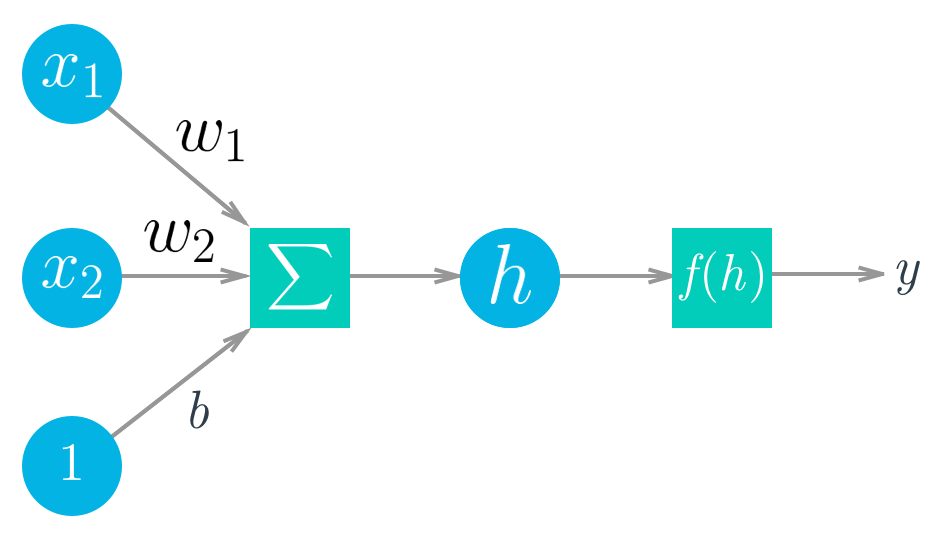

$$
\begin{align}
y &= f(w_1 x_1 + w_2 x_2 + b) \\
y &= f\left(\sum_i w_i x_i +b \right)
\end{align}
$$

Với vectơ, đây là tích vô hướng của 2 vectơ

$$
h = \begin{bmatrix}
x_1 \, x_2 \cdots  x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
           w_1 \\
           w_2 \\
           \vdots \\
           w_n
\end{bmatrix}
$$

## Tensors

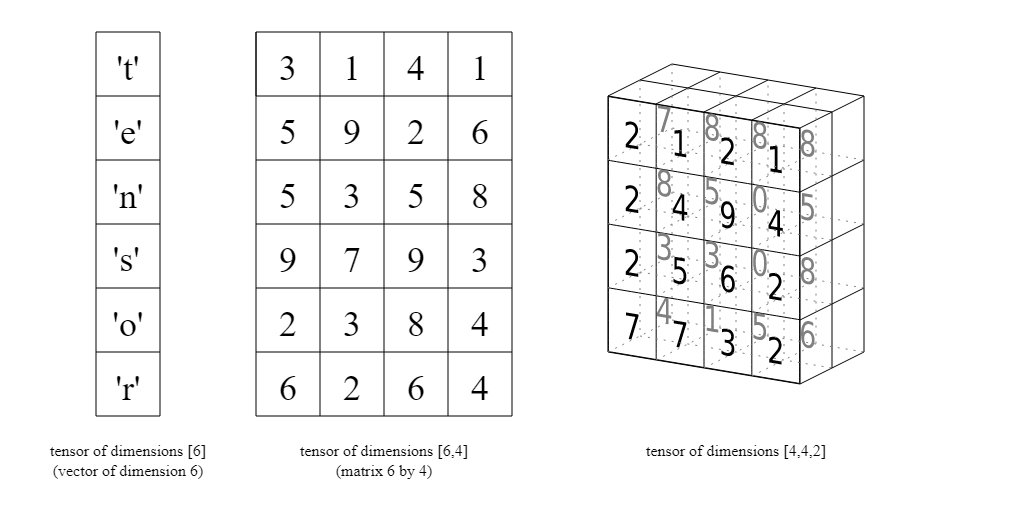

Các phép tính trên mạng nơron thực ra chỉ là 1 loạt các phép toán đại số tuyến tính trên các tensor, 1 dạng tổng quát của các ma trận. Vectơ là tensor 1 chiều, ma trận là tensor 2 chiều, 1 mảng có ba chỉ số là tensor 3 chiều (ví dụ: hình ảnh màu RGB). Cấu trúc dữ liệu cơ bản cho mạng nơ-ron là tensors, và PyTorch được xây dựng xung quanh tensors.

- [`torch.exp()`](https://pytorch.org/docs/stable/generated/torch.exp.html)

In [5]:
def activation(x):
    """ Sigmoid activation function

        Arguments
        ---------
        x: torch.Tensor
    """
    return 1 / (1 + torch.exp(-x))

- [`torch.randn()`](https://pytorch.org/docs/stable/generated/torch.randn.html)
- [`torch.randn_like()`](https://pytorch.org/docs/stable/generated/torch.randn_like.html)

In [6]:
### Generate data
torch.manual_seed(7)

# Các features là 5 biến ngẫu nhiên
features = torch.randn((1, 5))

# True weights
weights = torch.randn_like(features)

# true bias
bias = torch.randn((1, 1))

Chúng ta đã generate dữ liệu có thể sử dụng để lấy output của mạng. Tất cả là ngẫu nhiên (chúng ta sẽ sử dụng dữ liệu thật ở các bài sau).

- `features = torch.randn ((1, 5))` tạo ra 1 tensor  `(1, 5)`, 1 hàng và 5 cột, chứa các giá trị được phân phối ngẫu nhiên theo phân phối chuẩn với giá trị trung bình = 0 và độ lệch chuẩn = 1.

- `weights = torch.randn_like (features)` tạo 1 tensor khác có shape giống như `features`, cũng chứa các giá trị từ phân phối chuẩn.

- `bias = torch.randn ((1, 1))` tạo ra 1 giá trị duy nhất từ ​​phân phối chuẩn.

Các tensor trong PyTorch có thể được cộng, nhân, trừ, v.v., giống như mảng Numpy.

> **Bài tập:** Tính toán output của mạng với đầu vào là `feature`, ` weights` và `bias`. Tương tự như Numpy, PyTorch có hàm [`torch.sum()`](https://pytorch.org/docs/stable/torch.html#torch.sum), cũng như phương thức `.sum ()` trên tensors để tính tổng. Sử dụng hàm `activation()` được định nghĩa ở trên làm hàm kích hoạt.

In [7]:
## Fill your code here

y = activation(torch.mm(features, weights.T) + bias)
print(y)

tensor([[0.1595]])


Chúng ta có thể thực hiện phép nhân và tổng trong cùng 1 phép toán bằng phép nhân ma trận. Nói chung, bạn sẽ muốn sử dụng phép nhân ma trận vì chúng hiệu quả hơn và được tăng tốc bằng cách sử dụng các thư viện hiện đại và tính toán hiệu suất cao trên GPU.

Ở đây, chúng ta muốn thực hiện phép nhân ma trận của `features`, `weights`

- [`torch.mm()`](https://pytorch.org/docs/stable/torch.html#torch.mm)
- [`torch.matmul()`](https://pytorch.org/docs/stable/torch.html#torch.matmul)

Nếu thử với `features` và `weights`, sẽ gặp lỗi sau

```python
>> torch.mm(features, weights)
---------------------------------------------------------------------------
RuntimeError                              Traceback (most recent call last)
<ipython-input-13-15d592eb5279> in <module>()
----> 1 torch.mm(features, weights)

RuntimeError: size mismatch, m1: [1 x 5], m2: [1 x 5] at ...
```

Các tensor không có shape phù hợp để thực hiện phép nhân ma trận. Đối với phép nhân ma trận, số cột trong ma trận đầu tiên phải bằng số hàng trong ma trận thứ hai.

Cả `features` và `weights` đều có shape giống nhau,` (1, 5) `. Chúng ta cần thay đổi shape của `weights` để có thể nhân ma trận.

**Lưu ý:** Sử dụng `tensor.shape`.

1 số tùy chọn:
- [`weights.reshape()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.reshape)
- [`weights.resize_()`]( https://pytorch.org/docs/stable/tensors.html#torch.Tensor.resize_)
- [`weights.view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view).

* `weights.reshape(a, b)` sẽ trả về 1 tensor mới với dữ liệu giống như `weights` với size` (a, b) `đôi khi và đôi khi là 1 bản sao, vì nó sao chép dữ liệu sang 1 phần khác của bộ nhớ.
* `weights.resize_(a, b)` trả về cùng 1 tensor với 1 hình dạng khác. Tuy nhiên, nếu hình dạng mới tạo ra ít phần tử hơn tensor ban đầu, 1 số phần tử sẽ bị xóa khỏi tensor (nhưng không phải khỏi bộ nhớ). Nếu hình dạng mới tạo ra nhiều phần tử hơn tensor ban đầu, các phần tử mới sẽ không được khởi tạo trong bộ nhớ. Ở đây ta cần lưu ý rằng dấu gạch dưới ở cuối phương thức biểu thị rằng phương thức này được thực hiện **tại chỗ**. [đọc thêm](https://discuss.pytorch.org/t/what-is-in-place-operation/16244).
* `weights.view(a, b)` sẽ trả về 1 tensor mới có cùng dữ liệu với `weights` với size `(a, b)`.

> **Bài tập**: Tính toán đầu ra của mạng nhỏ của chúng ta bằng phép nhân ma trận.

In [8]:
## Fill your code here

y = activation(torch.mm(features, weights.reshape(5,1)) + bias)
print(y)

tensor([[0.1595]])


Đó là cách bạn có thể tính toán đầu ra cho 1 nơ-ron duy nhất. Sức mạnh thực sự của thuật toán này là khi bạn bắt đầu xếp các unit riêng lẻ này thành các lớp và chồng các lớp, thành 1 mạng lưới các nơ-ron. Đầu ra của 1 lớp nơ-ron trở thành đầu vào cho lớp tiếp theo. Với nhiều unit đầu vào và unit đầu ra, giờ chúng ta cần biểu thị các trọng số dưới dạng ma trận.

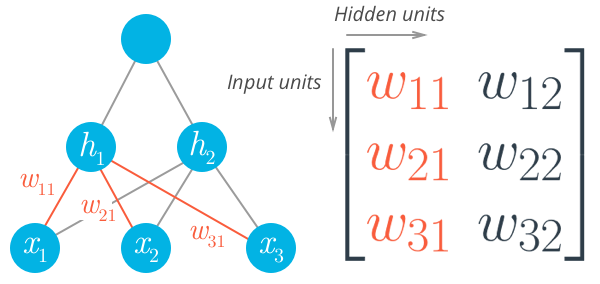

Lớp đầu tiên ở dưới cùng là các đầu vào, có thể hiểu là **lớp đầu vào**. Lớp giữa được gọi là **lớp ẩn** và lớp cuối cùng là **lớp đầu ra**. Chúng ta có thể biểu diễn lại mạng này bằng toán học với các ma trận và sử dụng phép nhân ma trận để có được các kết hợp tuyến tính cho mỗi đơn vị trong 1 phép toán. Ví dụ: có thể tính toán lớp ẩn ($ h_1 $ và $ h_2 $ ở đây)

$$
\vec{h} = [h_1 \, h_2] =
\begin{bmatrix}
x_1 \, x_2 \cdots \, x_n
\end{bmatrix}
\cdot
\begin{bmatrix}
           w_{11} & w_{12} \\
           w_{21} &w_{22} \\
           \vdots &\vdots \\
           w_{n1} &w_{n2}
\end{bmatrix}
$$

Đầu ra cho mạng này được tính bằng cách coi lớp ẩn là đầu vào cho đơn vị đầu ra. Đầu ra mạng

$$
y =  f_2 \! \left(\, f_1 \! \left(\vec{x} \, \mathbf{W_1}\right) \mathbf{W_2} \right)
$$

In [9]:
torch.manual_seed(7)

# Features are 3 random normal variables
features = torch.randn((1, 3))

# Define size of each layer in our network
n_input = features.shape[1]     # Number of input units, must match number of input features
n_hidden = 2                    # Number of hidden units
n_output = 1                    # Number of output units

# Weights for inputs to hidden layer
W1 = torch.randn(n_input, n_hidden)

# Weights for hidden layer to output layer
W2 = torch.randn(n_hidden, n_output)

# bias terms for hidden and output layers
B1 = torch.randn((1, n_hidden))
B2 = torch.randn((1, n_output))

> **Bài tập:** Tính toán đầu ra cho mạng nhiều lớp này bằng cách sử dụng trọng số `W1` &` W2`, và bias, `B1` &` B2`.

In [11]:
## Fill your code here

h1 = activation(torch.mm(features, W1) + B1)

output = activation(torch.mm(h1, W2) + B2)

print(output)

tensor([[0.3171]])


**Expected output:** `tensor ([[ 0.3171]])`.

Số lượng đơn vị ẩn là 1 tham số của mạng, thường được gọi là **siêu tham số** để phân biệt nó với các tham số trọng số và độ lệch. Như bạn sẽ thấy ở phần sau khi chúng ta học về train mạng nơ-ron, mạng càng có nhiều đơn vị ẩn và càng nhiều lớp, thì khả năng học hỏi từ dữ liệu và đưa ra dự đoán chính xác càng tốt.

## Numpy to Torch

PyTorch có 1 tính năng tuyệt vời để chuyển đổi giữa mảng Numpy và Torch tensors.
- Để tạo 1 tensor từ 1 mảng Numpy, sử dụng `torch.from_numpy ()`.
- Để chuyển đổi 1 tensor thành 1 mảng Numpy, sử dụng `.numpy ()`

In [12]:
a = np.random.rand(4,3)
a

array([[0.36282681, 0.62446744, 0.06558191],
       [0.43709003, 0.17717423, 0.81567945],
       [0.18087157, 0.40165377, 0.20025337],
       [0.17922919, 0.27660907, 0.75186019]])

In [13]:
b = torch.from_numpy(a)
b

tensor([[0.3628, 0.6245, 0.0656],
        [0.4371, 0.1772, 0.8157],
        [0.1809, 0.4017, 0.2003],
        [0.1792, 0.2766, 0.7519]], dtype=torch.float64)

In [14]:
b.numpy()

array([[0.36282681, 0.62446744, 0.06558191],
       [0.43709003, 0.17717423, 0.81567945],
       [0.18087157, 0.40165377, 0.20025337],
       [0.17922919, 0.27660907, 0.75186019]])

In [15]:
# Multiply PyTorch Tensor by 2, in place
b.mul_(2)

tensor([[0.7257, 1.2489, 0.1312],
        [0.8742, 0.3543, 1.6314],
        [0.3617, 0.8033, 0.4005],
        [0.3585, 0.5532, 1.5037]], dtype=torch.float64)

In [16]:
# Numpy array matches new values from Tensor
a

array([[0.72565362, 1.24893488, 0.13116383],
       [0.87418007, 0.35434846, 1.6313589 ],
       [0.36174314, 0.80330754, 0.40050673],
       [0.35845839, 0.55321813, 1.50372039]])

# Mạng nơ-ron trong PyTorch

Các mạng học sâu có xu hướng khổng lồ với hàng chục hoặc hàng trăm lớp, đó là vì sao có thuật ngữ "sâu". Bạn có thể xây dựng 1 trong những mạng sâu này chỉ bằng cách sử dụng ma trận trọng số như chúng ta đã làm trong sổ tay trước, nhưng nói chung nó rất cồng kềnh và khó thực hiện. PyTorch có module `nn` cung cấp 1 cách dễ dàng để xây dựng hiệu quả các mạng nơ-ron lớn.

Chúng ta sẽ xây dựng 1 mạng lớn hơn có thể giải quyết 1 bài toán khó (so với trước đây), là xác định văn bản trong 1 hình ảnh. Ở đây chúng ta sẽ sử dụng tập dữ liệu MNIST bao gồm các chữ số viết tay theo thang độ xám (grayscale). Mỗi hình ảnh có kích thước 28x28 pixel

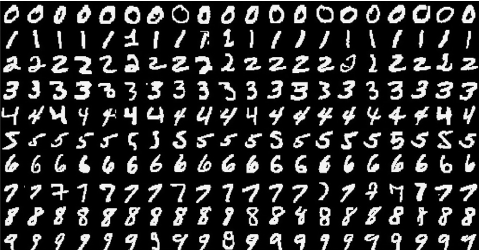

Mục tiêu là xây dựng 1 mạng nơ-ron có thể lấy 1 trong những hình ảnh này và dự đoán chữ số trong hình ảnh.

Đầu tiên, chúng ta cần lấy tập dữ liệu. Tập dữ liệu được cung cấp thông qua `torchvision`. Đoạn code dưới đây sẽ tải xuống bộ dữ liệu MNIST, sau đó tạo bộ dữ liệu train và test.

In [17]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [18]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 51349719.57it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1992953.40it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14699712.63it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3236583.21it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



chúng ta có dữ liệu huấn luyện được tải vào `trainloader` và chúng ta biến nó thành 1 trình lặp với `iter (trainloader)`. Sau đó, chúng ta sẽ sử dụng để lặp qua tập dữ liệu để huấn luyện, như
```python
for image, label in trainloader:
    ## do things with images and labels
```
Tạo `trainloader` với kích thước batch là 64 và `shuffle = True`. Kích thước batch là số lượng hình ảnh nhận được trong 1 lần lặp lại từ trình tải dữ liệu và chuyển qua mạng, được gọi là *batch*. Và `shuffle = True` yêu cầu nó xáo trộn tập dữ liệu mỗi khi chúng ta bắt đầu duyệt lại bộ tải dữ liệu. Nhưng ở đây chỉ lấy đợt đầu tiên để chúng ta có thể kiểm tra dữ liệu. Có thể thấy bên dưới rằng `hình ảnh` chỉ là 1 tensor với kích thước `(64, 1, 28, 28)`. Vì vậy, 64 hình ảnh mỗi batch, 1 kênh màu và hình ảnh 28x28.

In [20]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Đây là 1 trong những hình ảnh

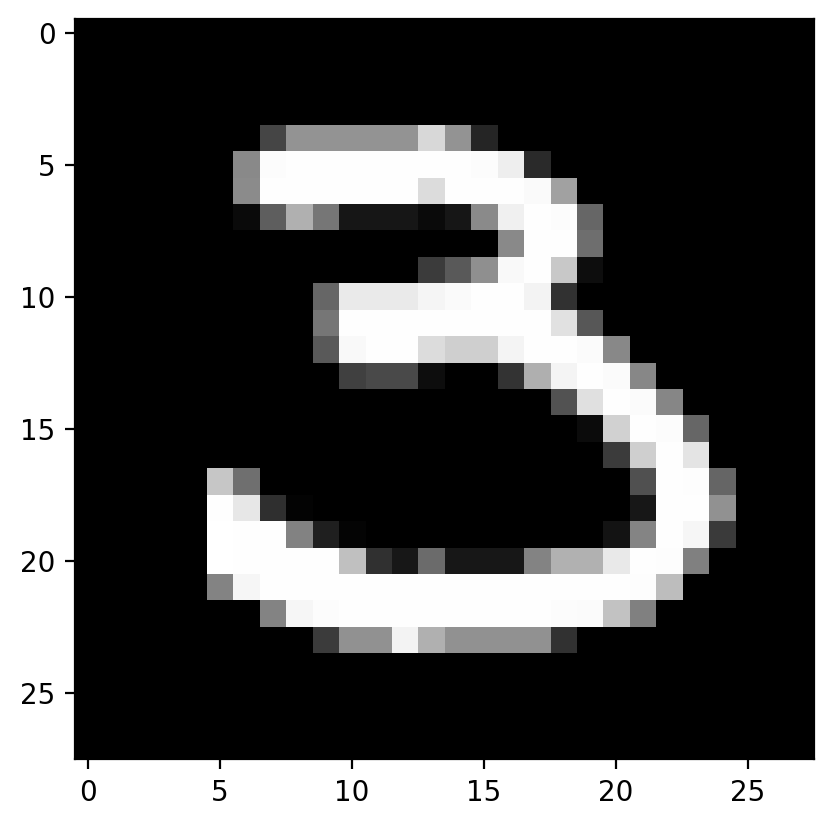

In [21]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

Đầu tiên, chúng ta xây dựng 1 mạng đơn giản cho tập dữ liệu này bằng cách sử dụng ma trận trọng số và phép nhân ma trận. Sau đó, chúng ta sẽ xem cách thực hiện bằng cách sử dụng module `nn` của PyTorch, module này cung cấp 1 phương pháp thuận tiện và mạnh mẽ hơn nhiều để xác định kiến ​​trúc mạng.

Các mạng bạn đã thấy cho đến nay được gọi là mạng *được kết nối đầy đủ* hoặc *dày đặc* (*fully-connected* or *dense* networks). Mỗi unit trong 1 lớp được kết nối với mỗi unit trong lớp tiếp theo. Trong các mạng được kết nối đầy đủ, đầu vào cho mỗi lớp phải là vectơ 1 chiều (có thể xếp chồng lên nhau thành 1 tensor 2D dưới dạng 1 loạt nhiều ví dụ). Tuy nhiên, hình ảnh của chúng ta là 28x28 2D tensors, vì vậy chúng ta cần chuyển đổi chúng thành vectơ 1D. Suy nghĩ về kích thước, chúng ta cần chuyển đổi hàng loạt hình ảnh có hình dạng `(64, 1, 28, 28)` thành hình dạng `(64, 784)`, 784 là 28 lần 28. Điều này thường được gọi là *làm phẳng*, chúng ta làm phẳng các hình ảnh 2D thành các vectơ 1D.

Trước đây bạn đã xây dựng 1 mạng với 1 unit đầu ra. Ở đây chúng ta cần 10 unit đầu ra, 1 cho mỗi chữ số. chúng ta muốn mạng của mình dự đoán chữ số được hiển thị trong 1 hình ảnh, vì vậy những gì chúng ta sẽ làm là tính toán xác suất mà hình ảnh đó là bất kỳ 1 chữ số hoặc lớp nào. Điều này kết thúc là 1 phân phối xác suất rời rạc trên các lớp (chữ số) cho chúng ta biết lớp có khả năng xảy ra nhất cho hình ảnh. Điều đó có nghĩa là chúng ta cần 10 unit đầu ra cho 10 lớp (chữ số). Tiếp theo, chúng ta sẽ xem cách chuyển đổi đầu ra mạng thành phân phối xác suất.

> **Bài tập:** Làm phẳng hàng loạt ảnh `ảnh`. Sau đó, xây dựng 1 mạng nhiều lớp với 784 unit đầu vào, 256 unit ẩn và 10 unit đầu ra bằng cách sử dụng bộ căng ngẫu nhiên cho trọng số và độ lệch. Hiện tại, hãy sử dụng kích hoạt sigmoid cho lớp ẩn. Để lại lớp đầu ra mà không có kích hoạt, chúng ta sẽ thêm 1 lớp cung cấp cho chúng ta phân phối xác suất tiếp theo.

In [30]:
## Fill your code here

# Flatten the input images
# Hint: use .view()
print(images.shape)
inputs = images.view(images.shape[0], -1)


# Create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)

w2 = torch.randn(256, 10)
b2 = torch.randn(10)

h = activation(torch.mm(inputs, w1) + b1)

out = activation(torch.mm(h, w2) + b2)

print(out.shape)


torch.Size([64, 1, 28, 28])
torch.Size([64, 10])


Bây giờ chúng ta có 10 đầu ra cho mạng của chúng ta. chúng ta muốn truyền 1 hình ảnh vào mạng của chúng ta và lấy ra 1 phân phối xác suất trên các lớp cho chúng ta biết (các) lớp có khả năng mà hình ảnh đó thuộc về. 1 cái gì đó trông giống như thế này:

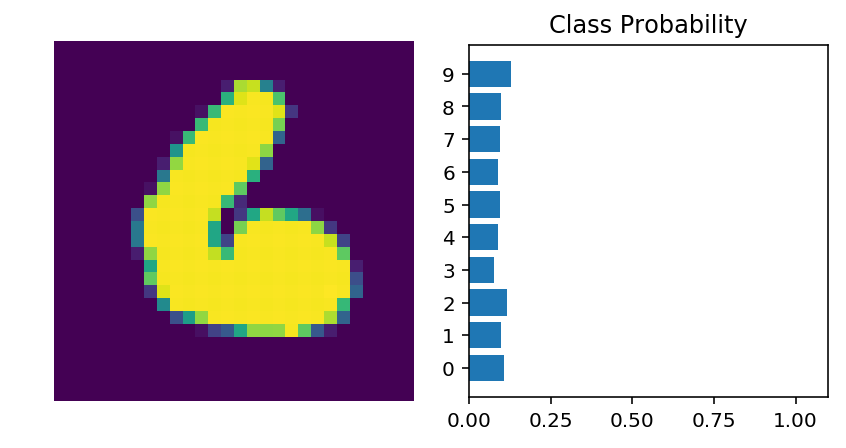


Ở đây chúng ta thấy rằng xác suất cho mỗi lớp là gần như nhau. Đây là đại diện cho 1 mạng chưa được huấn luyện, nó chưa nhìn thấy bất kỳ dữ liệu nào nên nó chỉ trả về 1 phân phối đồng nhất với xác suất bằng nhau cho mỗi lớp.
Để tính toán phân phối xác suất này, chúng ta thường sử dụng [**softmax** function](https://en.wikipedia.org/wiki/Softmax_function). Về mặt toán học

$$
\Large \sigma(x_i) = \cfrac{e^{x_i}}{\sum_k^K{e^{x_k}}}
$$

Bình phương mỗi đầu vào $ x_i $ từ 0 đến 1 và chuẩn hóa các giá trị để cung cấp cho bạn phân phối xác suất thích hợp trong đó xác suất tổng bằng 1.
> **Bài tập:** Thực hiện 1 hàm `softmax` thực hiện phép tính softmax và trả về phân phối xác suất cho mỗi ví dụ trong batch. Lưu ý rằng bạn sẽ cần phải chú ý đến các hình dạng khi thực hiện điều này. Nếu bạn có tensor `a` với shape` (64, 10)` 'và tensor `b` với shape` (64,) `, thực hiện` a / b` sẽ cho bạn 1 lỗi vì PyTorch sẽ cố gắng thực hiện phân chia trên các cột (được gọi là broadcast) nhưng bạn sẽ nhận được kích thước không khớp. Đối với mỗi trong số 64 ví dụ, bạn chỉ muốn chia cho 1 giá trị, tổng ở mẫu số. Vì vậy, bạn cần `b` để có hình dạng là` (64, 1) `. Bằng cách này, PyTorch sẽ chia 10 giá trị trong mỗi hàng của `a` cho 1 giá trị trong mỗi hàng của` b`.

Hãy chú ý đến cách bạn lấy tổng. Bạn sẽ cần xác định từ khóa `dim` trong` torch.sum`. Đặt `dim = 0` lấy tổng trên các hàng trong khi` dim = 1` lấy tổng trên các cột.

In [34]:
## Fill your code here


def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1, 1)

x = torch.rand(1,10)
print(softmax(x))

tensor([[0.0764, 0.0642, 0.0772, 0.1402, 0.1555, 0.1348, 0.0904, 0.1055, 0.0920,
         0.0637]])


Check your work

In [35]:
probabilities = softmax(out)

# Does it have the right shape? Should be (64, 10)
print(probabilities.shape)

# Does it sum to 1?
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Xây dựng mạng

PyTorch cung cấp 1 module `nn` giúp việc xây dựng mạng trở nên đơn giản hơn nhiều. Đây là cách xây dựng với 784 đầu vào, 256 đơn vị ẩn, 10 đơn vị đầu ra và đầu ra softmax.

- [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)
- [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
- [`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)
- [`nn.Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)


In [36]:
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)

        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

        # Define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)

        return x

Hãy đi qua từng bước 1

```python
class Network(nn.Module):
```
Ở đây chúng ta đang kế thừa từ `nn.Module`. Kết hợp với `super().__init__ ()`, tạo ra 1 lớp theo dõi kiến ​​trúc và cung cấp rất nhiều phương thức và thuộc tính hữu ích. Bắt buộc phải kế thừa từ `nn.Module` khi bạn tạo 1 lớp cho mạng của mình. Bản thân tên của lớp có thể là bất kỳ thứ gì.
```python
self.hidden = nn.Linear(784, 256)
```
Dòng này tạo 1 module cho phép biến đổi tuyến tính, $ x \mathbf {W} + b $, với 784 đầu vào và 256 đầu ra và gán nó cho `self.hidden`. module tự động tạo các lực căng trọng lượng và độ lệch mà chúng ta sẽ sử dụng trong phương pháp `forward`. Bạn có thể truy cập bộ căng cân và thiên vị sau khi mạng (`net`) được tạo với` net.hidden.weight` và `net.hidden.bias`.
```python
self.output = nn.Linear(256, 10)
```
Tương tự, điều này tạo ra 1 phép biến đổi tuyến tính khác với 256 đầu vào và 10 đầu ra.
```python
self.sigmoid = nn.Sigmoid()
self.softmax = nn.Softmax(dim=1)
```
Ở đây ta đã xác định các hoạt động cho kích hoạt sigmoid và đầu ra softmax. Đặt `dim = 1` trong` nn.Softmax (dim = 1) `sẽ tính toán softmax trên các cột.
```python
def forward(self, x):
```
Mạng PyTorch được tạo bằng `nn.Module` phải có phương thức `forward` được xác định. Nó nhận trong 1 tensor `x` và chuyển nó qua các phép toán bạn đã xác định trong phương thức` __init__`.
```python
x = self.hidden(x)
x = self.sigmoid(x)
x = self.output(x)
x = self.softmax(x)
```
Ở đây tensor đầu vào `x` được chuyển qua mỗi hoạt động được gán lại cho` x`. Chúng ta có thể thấy rằng tensor đầu vào đi qua lớp ẩn, sau đó là hàm sigmoid, sau đó là lớp đầu ra và cuối cùng là hàm softmax.

Bạn đặt tên các biến ở đây là gì không quan trọng, miễn là đầu vào và đầu ra của các hoạt động phù hợp với kiến ​​trúc mạng bạn muốn xây dựng. Thứ tự mà bạn xác định các thứ trong phương thức `__init__` không quan trọng, nhưng bạn sẽ cần trình tự các thao tác 1 cách chính xác trong phương thức` forward`.
Bây giờ chúng ta có thể tạo 1 đối tượng `Network`.

In [37]:
# Create the network and look at its text representation
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

Bạn có thể xác định mạng 1 cách ngắn gọn và rõ ràng hơn bằng cách sử dụng module `torch.nn.filities`. Đây là cách phổ biến nhất mà bạn sẽ thấy các mạng được định nghĩa là nhiều hoạt động là các chức năng đơn giản của phần tử. chúng ta thường nhập module này dưới dạng `F`,` nhập torch.nn. chức năng dưới dạng F`.

In [38]:
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)

    def forward(self, x):
        # Hidden layer with sigmoid activation
        x = F.sigmoid(self.hidden(x))
        # Output layer with softmax activation
        x = F.softmax(self.output(x), dim=1)

        return x

### Activation functions

Cho đến nay chúng ta mới chỉ xem xét các hàm kích hoạt sigmoid và softmax, nhưng nói chung, bất kỳ hàm nào cũng có thể được sử dụng như 1 hàm kích hoạt. Yêu cầu duy nhất là để 1 mạng gần đúng với 1 hàm phi tuyến tính, các hàm kích hoạt phải phi tuyến tính. Dưới đây là 1 vài ví dụ khác về các hàm kích hoạt phổ biến: Tanh (tiếp tuyến hyperbol), và ReLU (đơn vị tuyến tính chỉnh lưu).

Trong thực tế, chức năng ReLU hầu như chỉ được sử dụng làm chức năng kích hoạt cho các lớp ẩn.

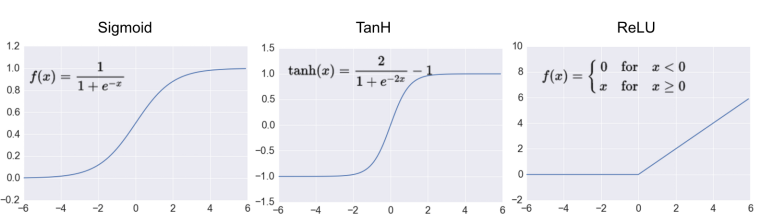

### Bài tập Xây dựng Mạng

> **Bài tập:** Tạo 1 mạng với 784 đơn vị đầu vào, 1 lớp ẩn với 128 đơn vị và kích hoạt ReLU, sau đó 1 lớp ẩn với 64 đơn vị và kích hoạt ReLU, và cuối cùng là 1 lớp đầu ra với kích hoạt softmax như hình trên . Bạn có thể sử dụng kích hoạt ReLU với module `nn.ReLU` hoặc hàm` F.relu`.

Bạn nên đặt tên cho các lớp của mình theo loại mạng của chúng, ví dụ như 'fc' để đại diện cho 1 lớp được kết nối đầy đủ. Hãy sử dụng `fc1`,` fc2` và `fc3` làm tên lớp.

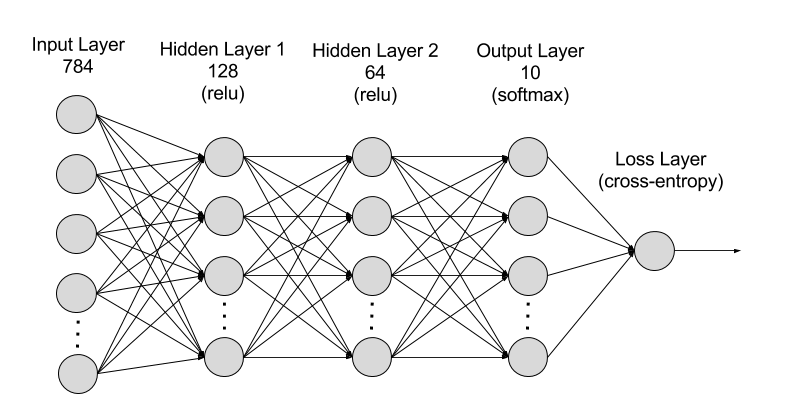

In [40]:
## Fill your code here

class Network(nn.Module):
    def __init__(self):
        super().__init__()

        # Hint: Use nn.Linear()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128,64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64,10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = self.softmax(x)



        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
)

### Khởi tạo trọng số và bias
Trọng số và bias được khởi tạo tự động cho bạn, nhưng bạn có thể tùy chỉnh cách khởi tạo chúng. Trọng số và bias được gắn vào lớp bạn đã xác định, bạn có thể lấy chúng bằng `model.fc1.weight` chẳng hạn.

In [41]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 0.0245,  0.0279, -0.0356,  ...,  0.0303, -0.0270,  0.0288],
        [-0.0169, -0.0073,  0.0266,  ..., -0.0027, -0.0355,  0.0168],
        [-0.0074,  0.0171,  0.0205,  ..., -0.0116,  0.0318, -0.0268],
        ...,
        [ 0.0272,  0.0254,  0.0171,  ...,  0.0229, -0.0290, -0.0176],
        [ 0.0237, -0.0198,  0.0145,  ..., -0.0226, -0.0042,  0.0327],
        [-0.0261,  0.0282, -0.0275,  ...,  0.0006, -0.0005, -0.0022]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0121, -0.0167,  0.0124, -0.0303, -0.0057,  0.0165, -0.0251,  0.0264,
        -0.0200, -0.0052,  0.0239, -0.0128,  0.0088,  0.0195,  0.0073, -0.0113,
         0.0026, -0.0189,  0.0221, -0.0176,  0.0271,  0.0032, -0.0260, -0.0078,
         0.0184, -0.0184, -0.0020,  0.0243, -0.0195, -0.0053,  0.0185,  0.0103,
         0.0239, -0.0176,  0.0039, -0.0160,  0.0085,  0.0008, -0.0292,  0.0057,
         0.0162, -0.0308,  0.0178, -0.0242, -0.0282, -0.0314, -0.0222,  0.0283,
        -0.0148

Để khởi tạo tùy chỉnh, chúng ta muốn sửa đổi các bộ căng này tại chỗ. Đây thực sự là các biến * autograd *, vì vậy chúng ta cần lấy lại các tensors thực với `model.fc1.weight.data`. Khi chúng ta có các tensor, chúng ta có thể điền chúng bằng các số không (đối với độ lệch) hoặc các giá trị bình thường ngẫu nhiên.

In [42]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [43]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[-8.5357e-03,  1.2046e-03, -2.7403e-02,  ...,  1.2252e-02,
         -1.0625e-02, -5.9998e-03],
        [ 2.0873e-05, -3.0580e-03, -2.6841e-03,  ..., -8.6402e-03,
         -1.8196e-02, -5.5468e-05],
        [ 8.6774e-03,  9.1874e-03, -9.3056e-04,  ..., -8.4499e-04,
         -5.1345e-03,  2.2727e-03],
        ...,
        [-8.1608e-05,  2.3162e-03,  8.3544e-03,  ..., -7.9327e-03,
          4.3130e-03,  6.7108e-03],
        [ 8.2210e-03,  1.9703e-02, -8.5863e-04,  ...,  3.0682e-03,
         -1.5745e-02, -3.3039e-03],
        [-4.5285e-03,  1.0758e-02,  2.8773e-03,  ...,  6.1195e-03,
         -3.3854e-03,  1.0357e-03]])

### Forward pass

Bây giờ chúng ta đã có 1 mạng, xem điều gì xảy ra khi truyền vào 1 hình ảnh.

In [44]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

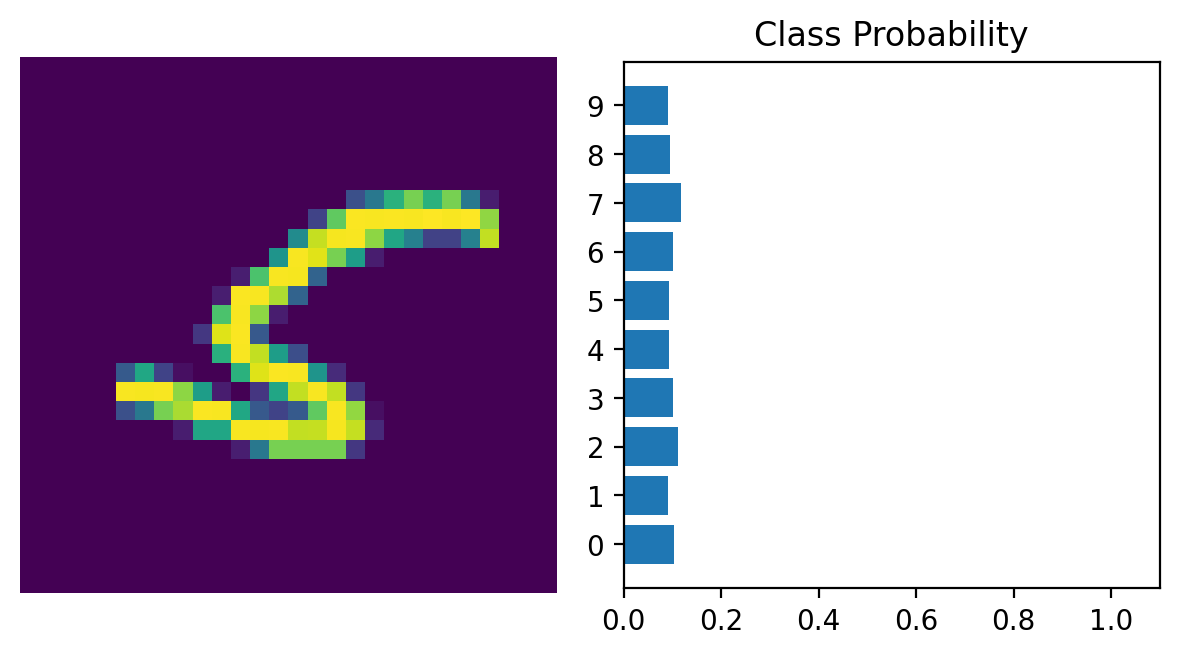

In [46]:
# Grab some data
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels)
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

Như bạn có thể thấy ở trên, mạng về cơ bản không biết chữ số này là gì. Đó là do chúng ta chưa huấn luyện nó, tất cả các trọng số là ngẫu nhiên!

### Sử dụng [`nn.Sequential`](https://pytorch.org/docs/master/nn.html#torch.nn.Sequential)

PyTorch cung cấp 1 cách thuận tiện để xây dựng các mạng như thế này trong đó tensor được truyền tuần tự thông qua các hoạt động, `nn.Sequential`. Sử dụng để xây dựng mạng sau:

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


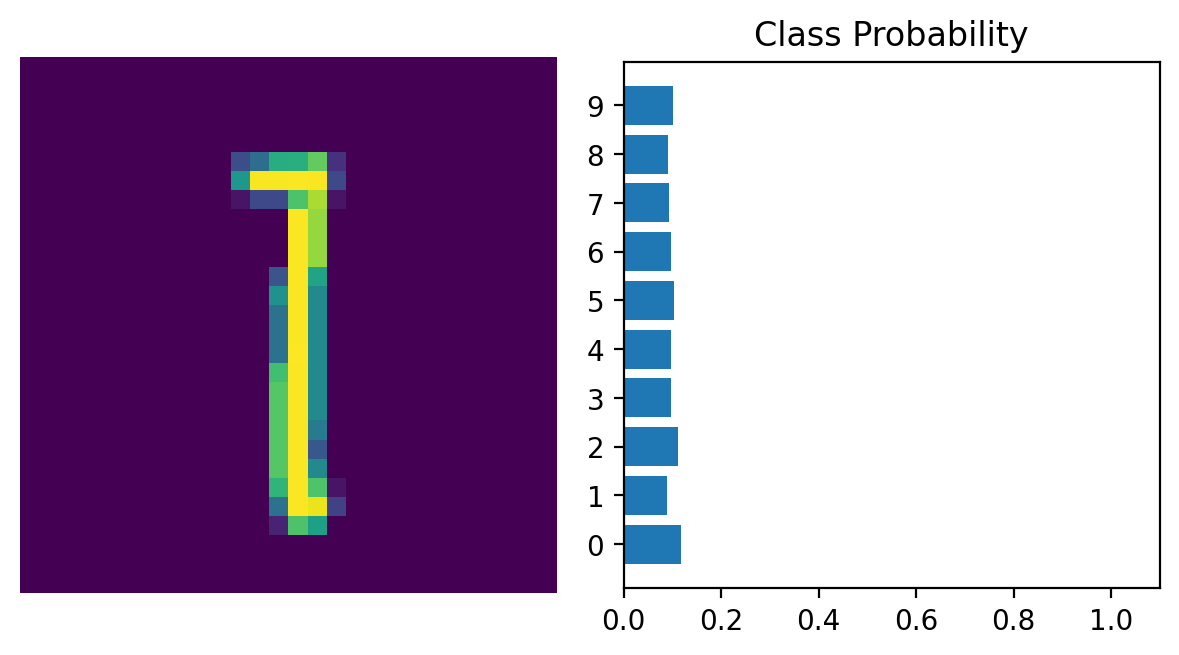

In [47]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)

Các hoạt động có sẵn bằng cách chuyển vào chỉ mục thích hợp. Ví dụ: nếu bạn muốn có phép toán Tuyến tính đầu tiên và xem trọng số, bạn sẽ sử dụng `model [0]`.

In [48]:
print(model[0])
model[0].weight

Linear(in_features=784, out_features=128, bias=True)


Parameter containing:
tensor([[-0.0245, -0.0014,  0.0025,  ..., -0.0209, -0.0346,  0.0054],
        [-0.0349, -0.0279, -0.0103,  ..., -0.0233, -0.0149, -0.0293],
        [-0.0085, -0.0273, -0.0263,  ..., -0.0053,  0.0298,  0.0142],
        ...,
        [ 0.0181, -0.0048, -0.0346,  ...,  0.0116, -0.0147,  0.0206],
        [-0.0271,  0.0215,  0.0244,  ..., -0.0034,  0.0043,  0.0244],
        [-0.0161, -0.0118,  0.0046,  ..., -0.0039, -0.0269,  0.0324]],
       requires_grad=True)

Bạn cũng có thể truyền vào 1 `OrderDict` để đặt tên cho các lớp và hoạt động riêng lẻ, thay vì sử dụng các số nguyên tăng dần. Lưu ý rằng các khóa từ điển phải là duy nhất, vì vậy mỗi thao tác phải có tên khác nhau.

In [49]:
from collections import OrderedDict
model = nn.Sequential(
    OrderedDict([
        ('fc1', nn.Linear(input_size, hidden_sizes[0])),
        ('relu1', nn.ReLU()),
        ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
        ('relu2', nn.ReLU()),
        ('output', nn.Linear(hidden_sizes[1], output_size)),
        ('softmax', nn.Softmax(dim=1))
    ]))
model

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (output): Linear(in_features=64, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)

Bây giờ bạn có thể truy cập các lớp theo số nguyên hoặc tên

In [50]:
print(model[0])
print(model.fc1)

Linear(in_features=784, out_features=128, bias=True)
Linear(in_features=784, out_features=128, bias=True)


Trong phần tiếp theo, chúng ta sẽ xem cách huấn luyện mạng nơ-ron để dự đoán chính xác các con số xuất hiện trong hình ảnh MNIST.

# Huấn luyện Mạng Nơ-ron




Mạng mà chúng ta xây dựng trong phần trước không quá thông minh, nó không biết gì về các chữ số viết tay của chúng ta. Mạng nơron có kích hoạt phi tuyến tính hoạt động giống như các bộ xấp xỉ hàm phổ quát. Có 1 số chức năng ánh xạ đầu vào của bạn với đầu ra. Ví dụ, hình ảnh của các chữ số viết tay để phân loại xác suất. Sức mạnh của mạng nơ-ron là chúng ta có thể huấn luyện chúng gần đúng với hàm này và về cơ bản là bất kỳ hàm nào được cung cấp đủ dữ liệu và thời gian tính toán.

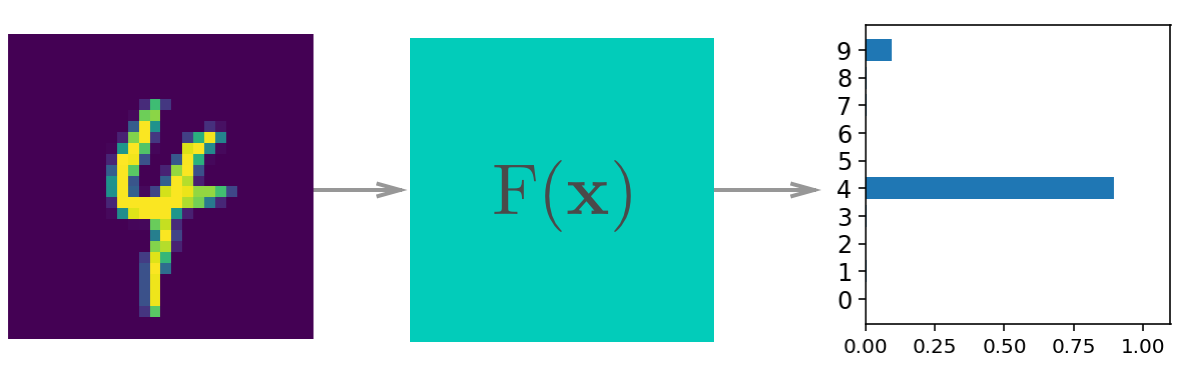

Lúc đầu, mạng còn ngây thơ, nó không biết chức năng ánh xạ các đầu vào đến đầu ra. chúng ta huấn luyện mạng bằng cách hiển thị cho nó các ví dụ về dữ liệu thực, sau đó điều chỉnh các tham số mạng sao cho nó gần đúng với chức năng này.
Để tìm các tham số này, chúng ta cần biết mạng dự đoán kết quả đầu ra thực kém như thế nào. Đối với điều này, chúng ta tính toán 1 **hàm mất mát** (còn được gọi là loss), 1 phép đo sai số dự đoán của chúng ta. Ví dụ, loss bình phương trung bình thường được sử dụng trong các bài toán hồi quy và phân loại nhị phân

$$
\large \ell = \frac {1} {2n} \sum_i ^ n {\left (y_i - \hat {y} _i \right) ^ 2}
$$

trong đó $ n $ là số lượng ví dụ huấn luyện, $ y_i $ là các nhãn đúng và $ \hat {y}_i $ là các nhãn được dự đoán.
Bằng cách giảm thiểu loss này đối với các thông số mạng, chúng ta có thể tìm thấy các cấu hình mà loss ở mức tối thiểu và mạng có thể dự đoán đúng các nhãn với độ chính xác cao. Chúng ta tìm thấy mức tối thiểu này bằng cách sử dụng 1 quy trình được gọi là **gradient descent**.

Gradient là độ dốc của hàm mất mát và chỉ theo hướng thay đổi nhanh nhất. Để đạt được mức tối thiểu trong khoảng thời gian ít nhất, chúng ta sau đó muốn theo gradient (xuống dưới). Bạn có thể nghĩ về điều này giống như việc đi xuống 1 ngọn núi bằng cách đi theo con dốc lớn nhất để đến chân núi.

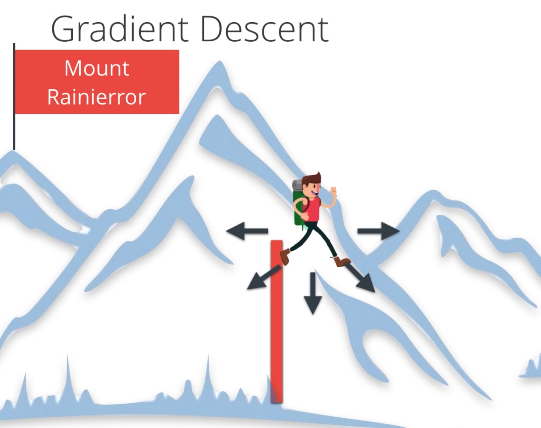

## Lan truyền ngược (backpropagation)

Đối với các mạng lớp đơn, việc triển khai dốc gradient rất dễ thực hiện. Tuy nhiên, nó phức tạp hơn đối với các mạng nơ-ron nhiều lớp sâu hơn như mạng mà chúng ta đã xây dựng. Phức tạp đến mức phải mất khoảng 30 năm trước khi các nhà nghiên cứu tìm ra cách huấn luyện mạng nhiều lớp.
Việc huấn luyện các mạng nhiều lớp được thực hiện thông qua **backpropagation** thực sự chỉ là 1 ứng dụng của quy tắc chuỗi từ phép tính. Dễ hiểu nhất là nếu chúng ta chuyển đổi mạng 2 lớp thành biểu diễn đồ thị.

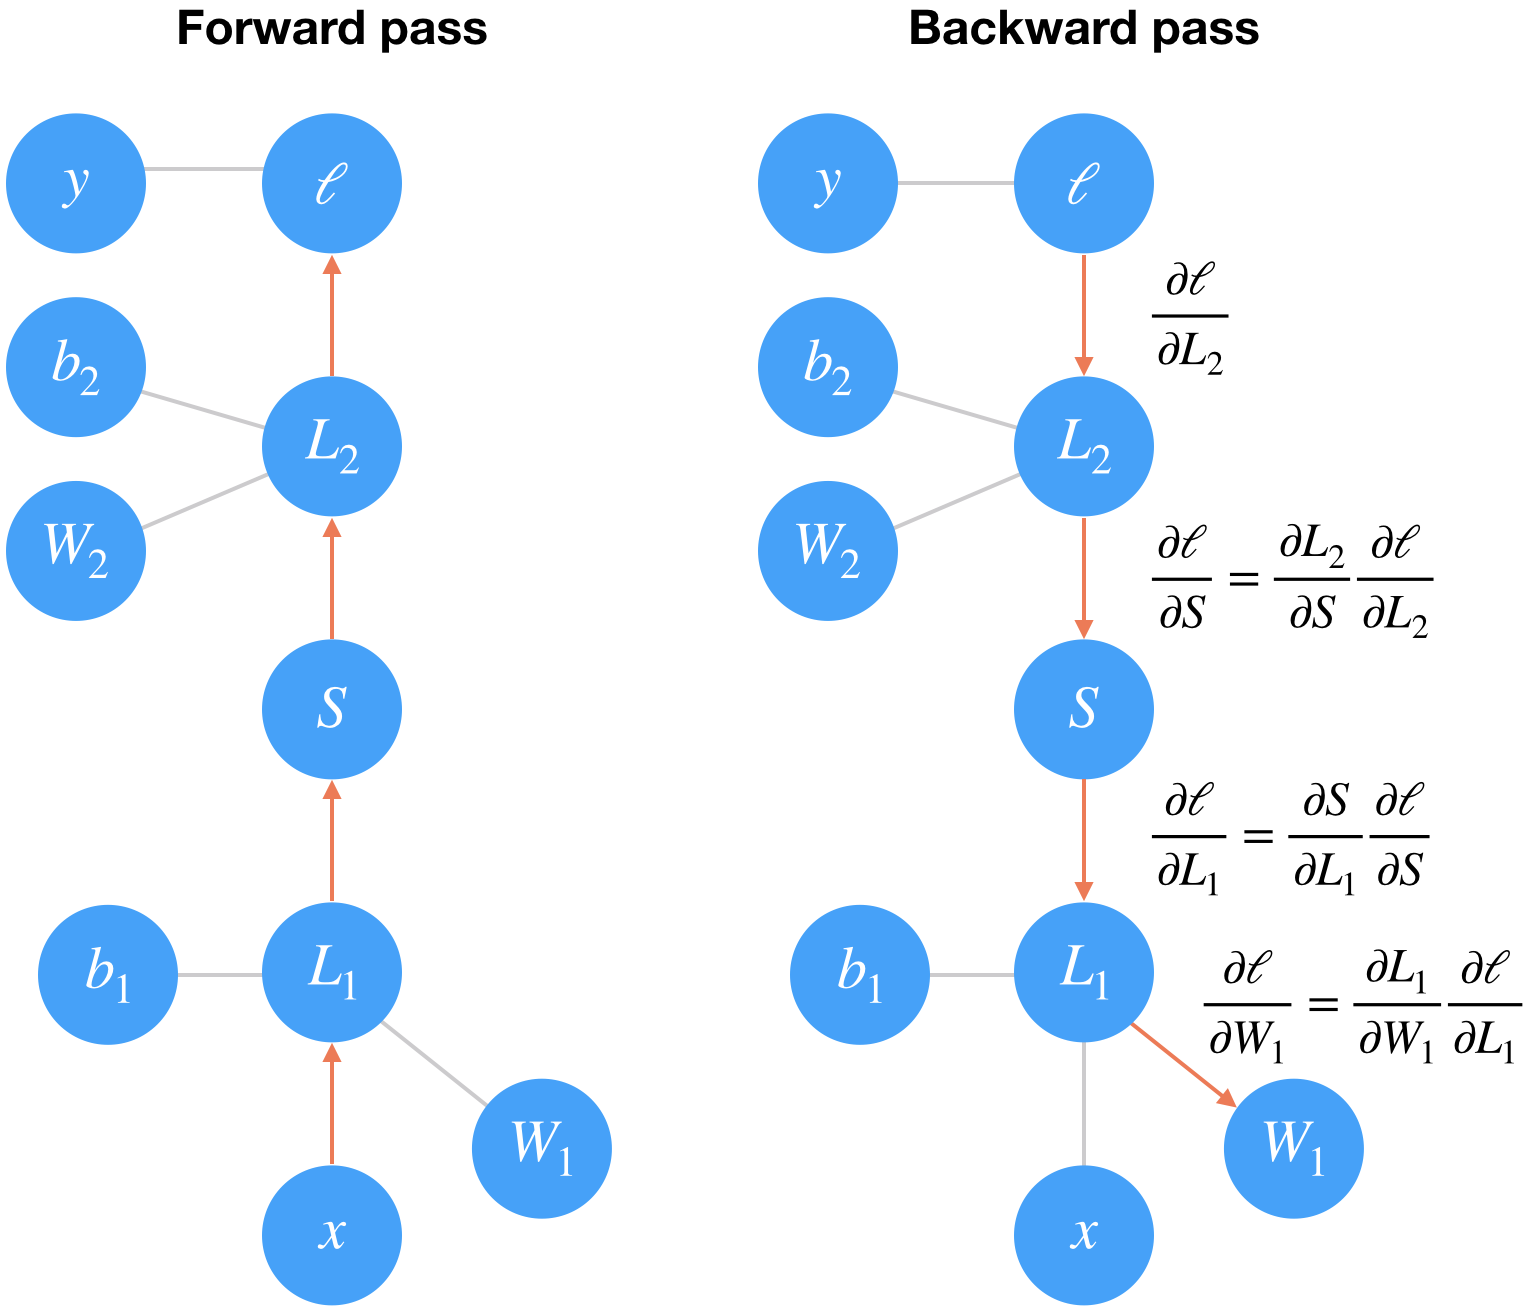

Trong quá trình forward pass qua mạng, dữ liệu và hoạt động của chúng ta đi từ dưới lên trên. Chuyển đầu vào $ x $ thông qua 1 phép biến đổi tuyến tính $ L_1 $ với các trọng số $ W_1 $ và các thành phần $ b_1 $. Đầu ra sau đó qua phép toán sigmoid $ S $ và 1 phép biến đổi tuyến tính khác $ L_2 $. Cuối cùng, chúng ta tính toán loss $\ell $.

Chúng ta sử dụng loss như 1 thước đo để đánh giá mức độ tồi tệ của các dự đoán của mạng lưới. Mục tiêu sau đó là điều chỉnh trọng lượng và độ lệch để giảm thiểu sự mất mát.

Để huấn luyện các trọng số với gradient giảm dần, chúng ta truyền ngược gradient của sự mất mát qua mạng. Mỗi hoạt động có 1 số gradient giữa đầu vào và đầu ra. Khi chúng ta gửi các gradient về phía sau, chúng ta nhân gradient đến với gradient cho hoạt động.

Về mặt toán học, đây thực sự chỉ là tính toán gradient của loss đối với trọng số bằng cách sử dụng quy tắc chuỗi.

$$
\large \frac{\partial \ell}{\partial W_1} = \frac{\partial L_1}{\partial W_1} \frac{\partial S}{\partial L_1} \frac{\partial L_2}{\partial S} \frac{\partial \ell}{\partial L_2}
$$

Chúng ta cập nhật trọng số bằng cách sử dụng gradient này với 1 số tốc độ học $\alpha $.

$$
\large W^\prime_1 = W_1 - \alpha \frac{\partial \ell}{\partial W_1}
$$

Tốc độ học $\alpha$ được đặt sao cho các bước cập nhật trọng số đủ nhỏ để phương pháp lặp lại giải quyết ở mức tối thiểu.

## Loss trong PyTorch
Hãy bắt đầu bằng cách xem cách chúng ta tính toán loss với PyTorch. Thông qua module `nn`, PyTorch cung cấp các loss như loss entropy chéo (` nn.CrossEntropyLoss`). Bạn sẽ thường thấy loss được gán cho `criterion`. Như đã lưu ý trong phần trước, với 1 bài toán phân loại chẳng hạn như MNIST, chúng ta đang sử dụng hàm softmax để dự đoán xác suất của lớp. Với đầu ra softmax, bạn muốn sử dụng entropy chéo làm loss. Để thực sự tính toán loss, trước tiên bạn xác định tiêu chí sau đó chuyển vào đầu ra của mạng của bạn và các nhãn chính xác.

Xem [`nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/nn.html#torch.nn.CrossEntropyLoss),
> Tiêu chí này kết hợp `nn.LogSoftmax()` và `nn.NLLLoss()` trong 1 lớp duy nhất.
>
> Đầu vào dự kiến ​​sẽ chứa điểm cho mỗi lớp.
Điều này có nghĩa là chúng ta cần chuyển đầu ra thô của mạng của mình vào phần loss, không phải đầu ra của hàm softmax. Đầu ra thô này thường được gọi là *logits* hoặc *score*. chúng ta sử dụng nhật ký vì softmax cung cấp cho bạn xác suất thường rất gần bằng 0 hoặc 1 nhưng số dấu phẩy động không thể đại diện chính xác các giá trị gần 0 hoặc 1 ([read more here](https://docs.python.org/3/tutorial/floatingpoint.html)). Tốt nhất là tránh thực hiện các phép tính với xác suất, thông thường chúng ta sử dụng xác suất log.

In [51]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [52]:
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [53]:
# Build a feed-forward network
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))

# Define the loss
criterion = nn.CrossEntropyLoss()

# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our logits
logits = model(images)
# Calculate the loss with the logits and the labels
loss = criterion(logits, labels)

print(loss)

tensor(2.3018, grad_fn=<NllLossBackward0>)


Theo kinh nghiệm, sẽ thuận tiện hơn khi xây dựng mô hình với đầu ra log-softmax bằng cách sử dụng `nn.LogSoftmax` hoặc` F.log_softmax` ([documentation](https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax)). Sau đó, bạn có thể nhận được các xác suất thực tế bằng cách lấy `torch.exp (output)` theo cấp số nhân. Với đầu ra log-softmax, bạn sử dụng negative log likelihood loss, `nn.NLLLoss` ([documentation](https://pytorch.org/docs/stable/nn.html#torch.nn.LogSoftmax)).
> **Bài tập:** Xây dựng mô hình trả về log-softmax làm đầu ra và tính toán loss bằng cách sử dụng negative log likelihood loss.

In [55]:
## Fill your code here

# Build a feed-forward network
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
)

# Define the loss
criterion = nn.NLLLoss()

Check the model and loss function

In [56]:
# Get our data
images, labels = next(iter(trainloader))
# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)
# Calculate the loss with the logps and the labels
loss = criterion(logps, labels)

print(loss)

tensor(-0.0204, grad_fn=<NllLossBackward0>)


## Autograd

Bây giờ chúng ta đã biết cách tính toán loss, chúng ta sử dụng nó như thế nào để thực hiện backpropagation? Torch cung cấp 1 module, `autograd`, để tự động tính toán độ dốc của các tensor. chúng ta có thể sử dụng nó để tính toán độ dốc của tất cả các tham số của chúng ta liên quan đến sự mất mát. Autograd hoạt động bằng cách theo dõi các hoạt động được thực hiện trên tensors, sau đó quay ngược lại các hoạt động đó, tính toán độ dốc trên đường đi. Để đảm bảo PyTorch theo dõi các hoạt động trên tensor và tính toán các gradient, bạn cần đặt `require_grad = True` trên tensor. Bạn có thể thực hiện việc này khi tạo với từ khóa `required_grad` hoặc bất kỳ lúc nào với `x.requires_grad_(True) `.
Bạn có thể tắt gradient cho 1 khối mã với nội dung `torch.no_grad ()`:
```python
x = torch.zeros(1, requires_grad=True)
>>> with torch.no_grad():
...     y = x * 2
>>> y.requires_grad
False
```
Ngoài ra, bạn có thể bật hoặc tắt hoàn toàn gradient với `torch.set_grad_enabled (True | False)`.
Các gradient được tính theo 1 số biến `z` với` z.backward() `. Điều này sẽ chuyển ngược lại các thao tác đã tạo ra `z`.

In [57]:
x = torch.randn(2,2, requires_grad=True)
print(x)

tensor([[-0.5604,  1.4829],
        [-1.1932, -0.4384]], requires_grad=True)


In [58]:
y = x**2
print(y)

tensor([[0.3140, 2.1990],
        [1.4236, 0.1922]], grad_fn=<PowBackward0>)


Dưới đây chúng ta có thể thấy hoạt động tạo ra `y`, 1 hoạt động nguồn` PowBackward0`.

In [59]:
## grad_fn shows the function that generated this variable
print(y.grad_fn)

module autograd theo dõi các hoạt động này và biết cách tính toán gradient cho từng hoạt động. Bằng cách này, nó có thể tính toán độ dốc cho 1 chuỗi hoạt động, đối với bất kỳ 1 tensor nào. Hãy giảm tensor `y` thành 1 giá trị vô hướng, giá trị trung bình.

In [60]:
z = y.mean()
print(z)

tensor(1.0322, grad_fn=<MeanBackward0>)


Bạn có thể kiểm tra các gradient cho `x` và` y` nhưng chúng hiện đang trống.

In [61]:
print(x.grad)

None


Để tính toán độ dốc, bạn cần chạy phương thức `.backward` trên 1 Biến, chẳng hạn như` z`. Điều này sẽ tính toán gradient cho `z` đối với` x`
$$
\frac{\partial z}{\partial x} = \frac{\partial}{\partial x}\left[\frac{1}{n}\sum_i^n x_i^2\right] = \frac{x}{2}
$$

In [62]:
z.backward()
print(x.grad)
print(x/2)

tensor([[-0.2802,  0.7415],
        [-0.5966, -0.2192]])
tensor([[-0.2802,  0.7415],
        [-0.5966, -0.2192]], grad_fn=<DivBackward0>)


Các tính toán gradient này đặc biệt hữu ích cho mạng nơ-ron. Để huấn luyện, chúng ta cần độ dốc của trọng số so với loss. Với PyTorch, chúng ta chạy dữ liệu về phía trước thông qua mạng để tính toán loss, sau đó quay ngược lại để tính toán độ dốc liên quan đến loss. Khi chúng ta đã có các gradient, chúng ta có thể thực hiện 1 bước giảm dần độ dốc.

## Loss và Autograd cùng nhau
Khi chúng ta tạo 1 mạng bằng PyTorch, tất cả các tham số đều được khởi tạo bằng `require_grad = True`. Điều này có nghĩa là khi chúng ta tính toán loss và gọi `loss.backward()`, các độ dốc cho các tham số sẽ được tính toán. Các gradient này được sử dụng để cập nhật các trọng số với độ dốc gradient. Dưới đây, bạn có thể xem 1 ví dụ về tính toán độ dốc bằng cách sử dụng backwards pass.

In [63]:
# Build a feed-forward network
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [64]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-1.8318e-03, -1.8318e-03, -1.8318e-03,  ..., -1.8318e-03,
         -1.8318e-03, -1.8318e-03],
        [ 1.5789e-04,  1.5789e-04,  1.5789e-04,  ...,  1.5789e-04,
          1.5789e-04,  1.5789e-04],
        [-2.6078e-03, -2.6078e-03, -2.6078e-03,  ..., -2.6078e-03,
         -2.6078e-03, -2.6078e-03],
        ...,
        [ 1.9893e-05,  1.9893e-05,  1.9893e-05,  ...,  1.9893e-05,
          1.9893e-05,  1.9893e-05],
        [-5.2750e-03, -5.2750e-03, -5.2750e-03,  ..., -5.2750e-03,
         -5.2750e-03, -5.2750e-03],
        [-3.2505e-04, -3.2505e-04, -3.2505e-04,  ..., -3.2505e-04,
         -3.2505e-04, -3.2505e-04]])


## Huấn luyện mạng
Có 1 phần cuối cùng mà chúng ta cần để bắt đầu huấn luyện, 1 trình tối ưu hóa mà chúng ta sẽ sử dụng để cập nhật trọng số với các gradient. Dùng [`optim`](https://pytorch.org/docs/stable/optim.html) của PyTorch. Ví dụ, chúng ta có thể sử dụng dốc nghiêng ngẫu nhiên với `optim.SGD`. Bạn có thể xem cách xác định trình tối ưu hóa bên dưới.

In [65]:
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

Bây giờ chúng ta biết cách sử dụng tất cả các bộ phận riêng lẻ nên đã đến lúc xem chúng hoạt động cùng nhau như thế nào. Hãy xem xét chỉ 1 bước học trước khi lặp qua tất cả dữ liệu. Quy trình chung với PyTorch:
* Thực hiện forward pass qua mạng
* Sử dụng đầu ra mạng để tính toán loss
* Thực hiện chuyển lùi qua mạng với `loss.backward()` để tính toán độ dốc
* Thực hiện 1 bước với trình tối ưu hóa để cập nhật trọng số
Dưới đây, ta sẽ đi qua 1 bước huấn luyện và in ra trọng lượng và độ dốc để bạn có thể thấy nó thay đổi như thế nào. Lưu ý rằng ta có 1 dòng mã `Optimizer.zero_grad ()`. Khi bạn thực hiện nhiều lần chuyển ngược lại với các thông số giống nhau, các gradient sẽ được tích lũy. Điều này có nghĩa là bạn cần phải làm giảm độ dốc của mỗi đợt huấn luyện hoặc bạn sẽ giữ lại độ dốc từ các đợt huấn luyện trước đó.

In [66]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0061, -0.0208, -0.0337,  ..., -0.0199,  0.0280,  0.0310],
        [-0.0356, -0.0323,  0.0081,  ...,  0.0153,  0.0113,  0.0119],
        [ 0.0161, -0.0189, -0.0039,  ...,  0.0302,  0.0243, -0.0172],
        ...,
        [-0.0065, -0.0151,  0.0212,  ...,  0.0226,  0.0076,  0.0064],
        [-0.0141,  0.0305, -0.0219,  ...,  0.0320, -0.0269, -0.0326],
        [-0.0079,  0.0314, -0.0086,  ..., -0.0330,  0.0079, -0.0327]],
       requires_grad=True)
Gradient - tensor([[-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [-0.0023, -0.0023, -0.0023,  ..., -0.0023, -0.0023, -0.0023],
        ...,
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0009,  0.0009,  0.0009,  ...,  0.0009,  0.0009,  0.0009],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005]])


In [67]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0061, -0.0208, -0.0337,  ..., -0.0199,  0.0280,  0.0310],
        [-0.0355, -0.0323,  0.0081,  ...,  0.0153,  0.0113,  0.0119],
        [ 0.0161, -0.0188, -0.0039,  ...,  0.0302,  0.0244, -0.0172],
        ...,
        [-0.0065, -0.0151,  0.0212,  ...,  0.0226,  0.0076,  0.0064],
        [-0.0141,  0.0305, -0.0219,  ...,  0.0320, -0.0269, -0.0326],
        [-0.0079,  0.0314, -0.0086,  ..., -0.0330,  0.0079, -0.0327]],
       requires_grad=True)


### Training for real
Bây giờ chúng ta sẽ đưa thuật toán này vào 1 vòng lặp để chúng ta có thể xem qua tất cả các hình ảnh.

- 1 phần đi qua toàn bộ tập dữ liệu được gọi là *epoch*. Vì vậy, ở đây chúng ta sẽ lặp qua `trainloader` để nhận các lô huấn luyện của chúng ta. Đối với mỗi batch, chúng ta sẽ thực hiện 1 lần huấn luyện trong đó chúng ta tính toán loss, thực hiện truyền ngược và cập nhật trọng số.
> **Bài tập:** Triển khai huấn luyện cho mạng. Nếu bạn đã triển khai nó 1 cách chính xác, bạn sẽ thấy sự mất mát huấn luyện giảm xuống theo từng epoch.

In [68]:
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
    nn.LogSoftmax(dim=1)
)

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [71]:
## Fill your code here

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        optimizer.zero_grad()

        ### Your code
        output = model(images)
        loss = criterion(output, labels)
        ###

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.8957465527408413
Training loss: 0.8394586139523399
Training loss: 0.52125380907867
Training loss: 0.4240972943333929
Training loss: 0.3792875345581884


Với mạng được huấn luyện, chúng ta có thể kiểm tra các dự đoán của nó.

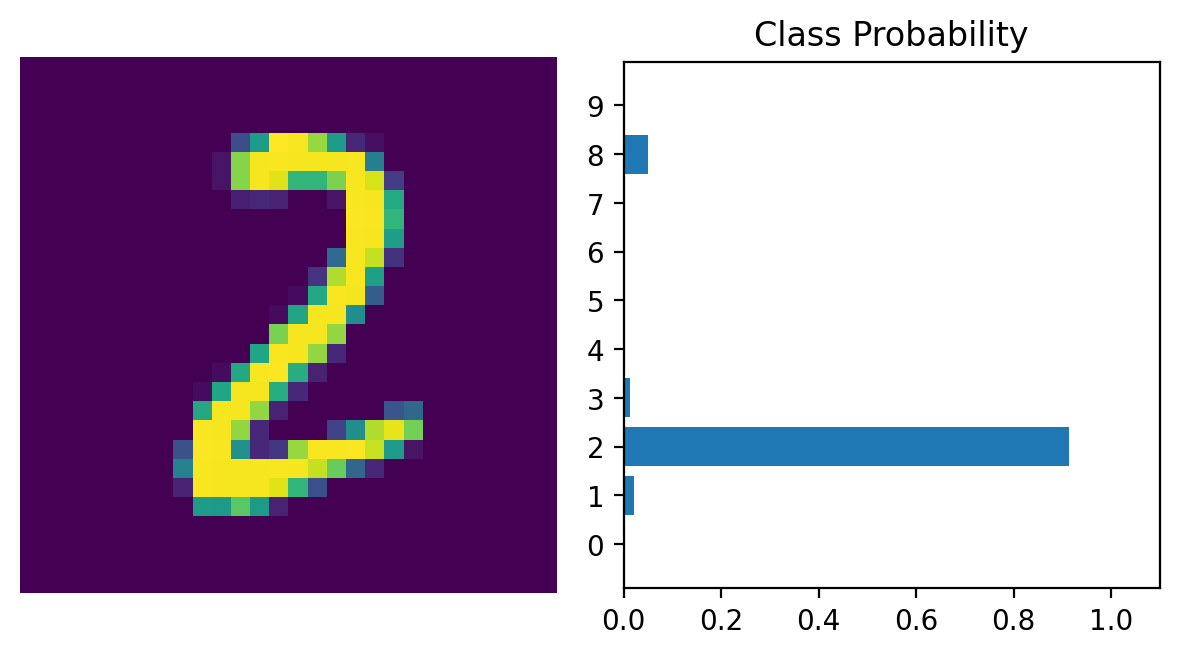

In [77]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
view_classify(img.view(1, 28, 28), ps)

Bây giờ mạng của chúng ta đã có thể dự đoán chính xác các chữ số trong hình ảnh.